In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input,Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim=15
input_img=Input(shape=(784,))
encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img,decoded)

In [ ]:
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


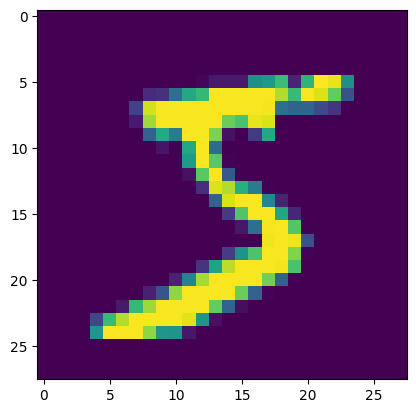

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
autoencoder.fit(x_train, x_train,
epochs=20,
batch_size=256,
validation_data=(x_test, x_test))


Epoch 1/20
235/235 [==============================] - 5s 16ms/step - loss: 0.3089 - val_loss: 0.2261
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 0.2027 - val_loss: 0.1840
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1764 - val_loss: 0.1675
Epoch 4/20
235/235 [==============================] - 3s 15ms/step - loss: 0.1635 - val_loss: 0.1574
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1552 - val_loss: 0.1507
Epoch 6/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1497 - val_loss: 0.1464
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1462 - val_loss: 0.1439
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1439 - val_loss: 0.1417
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1421 - val_loss: 0.1400
Epoch 10/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1405 - val_lo

313/313 [==============================] - 1s 1ms/step


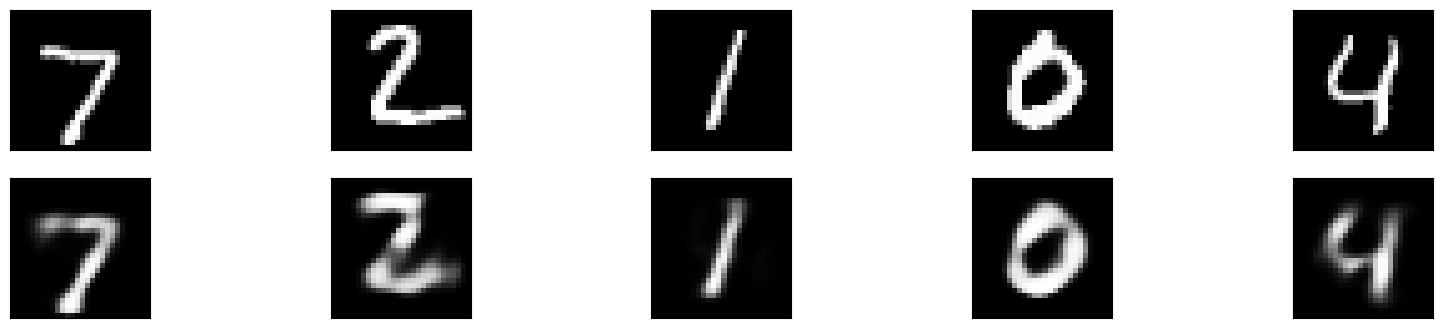

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
  # Display original
  ax = plt.subplot(2, 5, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, 5, i + 1 + 5)
  plt.imshow(decoded_img[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 2ms/step


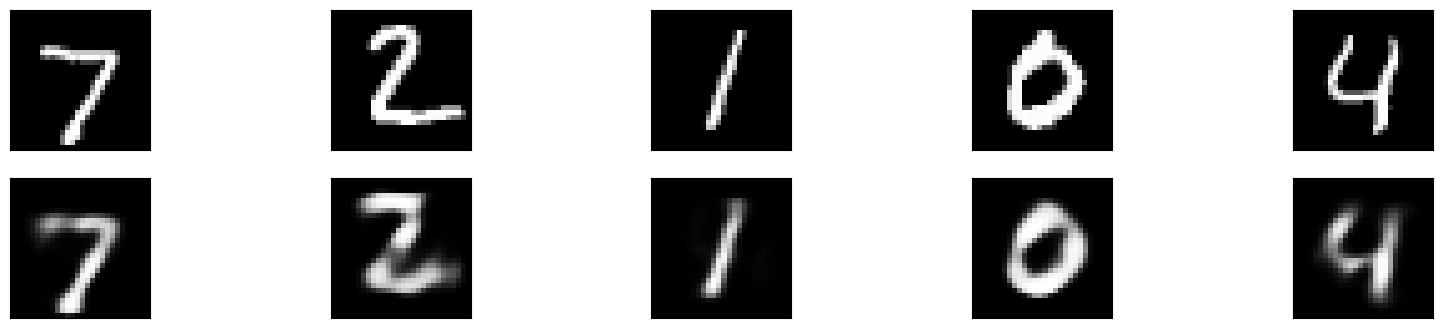

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
  # Display original
  ax = plt.subplot(2, 5, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, 5, i + 1 + 5)
  plt.imshow(decoded_img[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

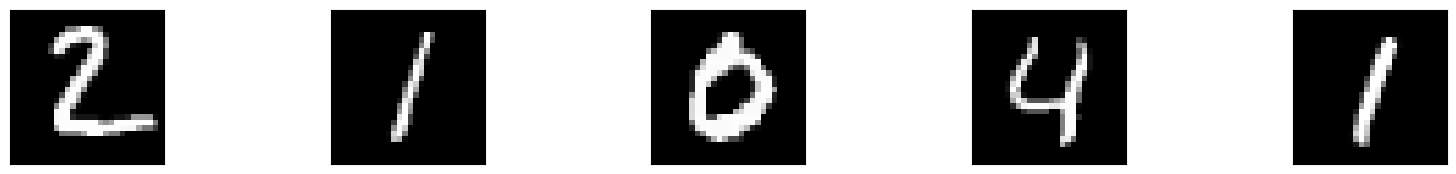

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
  ax = plt.subplot(1, 5, i)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

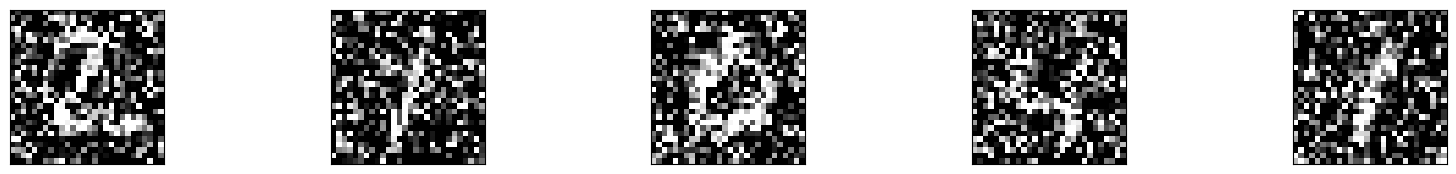

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
#Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
  ax = plt.subplot(1, 5, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train_noise = x_train_noisy.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_noise = x_test_noisy.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train_noise.shape)
print(x_test_noise.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train_noise, x_train,
epochs=20,
batch_size=256,
validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1866 - val_loss: 0.2047
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1708 - val_loss: 0.1932
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1680 - val_loss: 0.1902
Epoch 4/20
235/235 [==============================] - 2s 11ms/step - loss: 0.1667 - val_loss: 0.1862
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1659 - val_loss: 0.1816
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1655 - val_loss: 0.1795
Epoch 7/20
235/235 [==============================] - 5s 19ms/step - loss: 0.1651 - val_loss: 0.1756
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1648 - val_loss: 0.1734
Epoch 9/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1646 - val_loss: 0.1720
Epoch 10/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1645 - val_lo

313/313 [==============================] - 0s 1ms/step


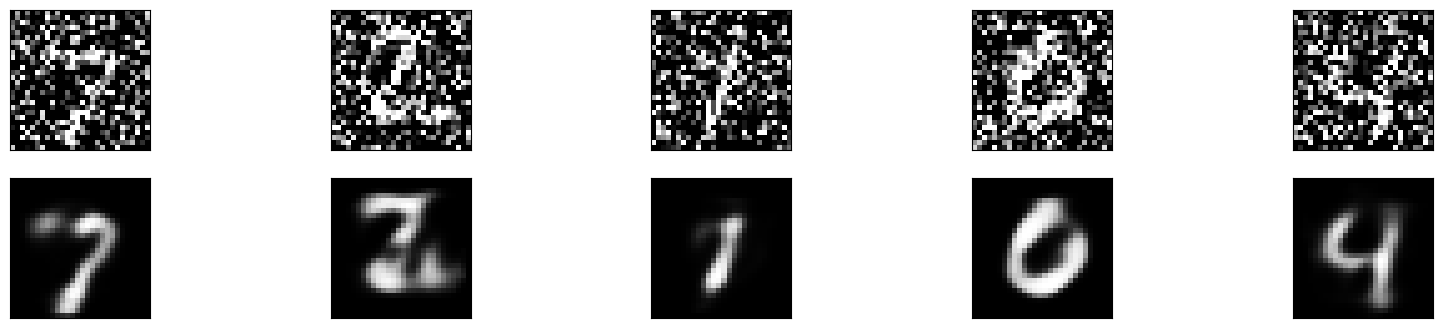

In [ ]:
encoded_img = encoder.predict(x_test_noise)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
  # Display original
  ax = plt.subplot(2, 5, i + 1)
  plt.imshow(x_test_noise[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, 5, i + 1 + 5)
  plt.imshow(decoded_img[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()